In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression



In [9]:
## Data Import and Manipulation
info_style_numeric = pd.read_csv("ittf_player_info_style_numeric.csv")
print(info_style_numeric.columns)
# Clean the "Name" column by removing all non-alphabetic characters
info_style_numeric['Name'] = info_style_numeric['Name'].str.replace(r'[^a-zA-Z\s-]', '', regex=True)
# Transform the df into a dict, of which the value is a list containing the numeric values of four styles
styles_dict = info_style_numeric.set_index('Name')[['Playing_hand_numeric', 'Playing_style_numeric', 'Grip_numeric', 'Style_commonness','Assoc']].apply(lambda row: row.tolist(), axis=1).to_dict()
ranking_not_aggregated = pd.read_csv("ittf_ranking_50.csv")
# Apply styles_dict to all cases of all columns of the ranking_50 df. 
# The result is a tuple of the player name and a list of style infos.
# For those players who are not in the styles_dict, the value is 99.
ranking_styles = ranking_not_aggregated.map(lambda x: (x, styles_dict.get(x, 99)))
# Rename column "Unnamed: 0" to "ranking"
ranking_styles = ranking_styles.rename(columns={"Unnamed: 0": "Ranking"})
# Replace tuples in the "ranking" column with their first element (to avoid adding 99 to this column)
ranking_styles['Ranking'] = ranking_styles['Ranking'].apply(lambda x: x[0] if isinstance(x, tuple) else x)
# Apply cleaning only to columns *other than* 'Ranking'
ranking_not_aggregated.loc[:, ranking_not_aggregated.columns != 'Ranking'] = (
    ranking_not_aggregated.loc[:, ranking_not_aggregated.columns != 'Ranking']
    .applymap(lambda x: re.sub(r'[^a-zA-Z\s-]', '', x) if isinstance(x, str) else x)
)
# Display result
print(ranking_styles.head())

Index(['Player ID', 'Name', 'Assoc', 'Gender', 'Birth year', 'Activity',
       'Playing hand', 'Playing style', 'Grip', 'Playing_hand_numeric',
       'Playing_style_numeric', 'Grip_numeric', 'Style_commonness'],
      dtype='object')
  Ranking                                    2001  \
0  Rank 1         (WANG Liqin, [0, 0, 0, 0, CHN])   
1  Rank 2  (SAMSONOV Vladimir, [0, 0, 0, 0, BLR])   
2  Rank 3             (MA Lin, [0, 0, 1, 1, CHN])   
3  Rank 4       (LIU Guozheng, [0, 0, 0, 0, CHN])   
4  Rank 5       (KONG Linghui, [0, 0, 0, 0, CHN])   

                                   2002  \
0           (MA Lin, [0, 0, 1, 1, CHN])   
1        (BOLL Timo, [1, 0, 0, 1, GER])   
2       (WANG Liqin, [0, 0, 0, 0, CHN])   
3  (SCHLAGER Werner, [0, 0, 0, 0, AUT])   
4     (KONG Linghui, [0, 0, 0, 0, CHN])   

                                     2003                               2004  \
0             (MA Lin, [0, 0, 1, 1, CHN])      (WANG Hao, [0, 0, 1, 1, CHN])   
1         (WANG Liqin, [0,

/var/folders/9p/6j8bfv1n36l90czq1nymvg780000gn/T/ipykernel_5653/1790396259.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: re.sub(r'[^a-zA-Z\s-]', '', x) if isinstance(x, str) else x)


In [18]:
allcountry={}
for col in ranking_styles.columns[1:]:
    countrys_this_year=ranking_styles[col].apply(lambda x:x[-1][-1] if isinstance(x[-1],list) else None)
    country_counts=countrys_this_year.value_counts()
    allcountry[col]=country_counts
print(allcountry)

{'2001': 2001
CHN    7
KOR    4
FRA    4
TPE    2
GER    2
AUT    2
NED    2
SWE    2
GRE    1
BLR    1
BEL    1
CRO    1
CZE    1
HKG    1
ESP    1
DEN    1
Name: count, dtype: int64, '2002': 2002
CHN    9
FRA    3
KOR    3
SWE    3
NED    2
GER    2
AUT    2
TPE    2
HKG    2
BEL    1
GRE    1
BLR    1
CRO    1
DEN    1
RUS    1
CZE    1
Name: count, dtype: int64, '2003': 2003
CHN    10
KOR     4
SWE     3
HKG     3
TPE     2
FRA     2
NED     2
AUT     2
GER     2
BEL     1
RUS     1
BLR     1
GRE     1
DEN     1
CZE     1
CRO     1
ROU     1
Name: count, dtype: int64, '2004': 2004
CHN    9
KOR    4
GER    3
AUT    3
SWE    3
TPE    2
RUS    2
FRA    2
HKG    2
BLR    1
DEN    1
BEL    1
GRE    1
NED    1
CZE    1
CRO    1
ROU    1
SRB    1
Name: count, dtype: int64, '2005': 2005
CHN    8
GER    4
KOR    4
SWE    3
FRA    2
TPE    2
CRO    2
AUT    2
NED    2
HKG    2
BLR    1
BEL    1
RUS    1
DEN    1
GRE    1
ROU    1
SGP    1
CZE    1
SRB    1
ESP    1
Name: count, dtype: int64,

['CHN', 'KOR', 'GER', 'JPN', 'SWE', 'AUT', 'HKG', 'TPE', 'FRA', 'CRO']


<Axes: xlabel='year', ylabel='count'>

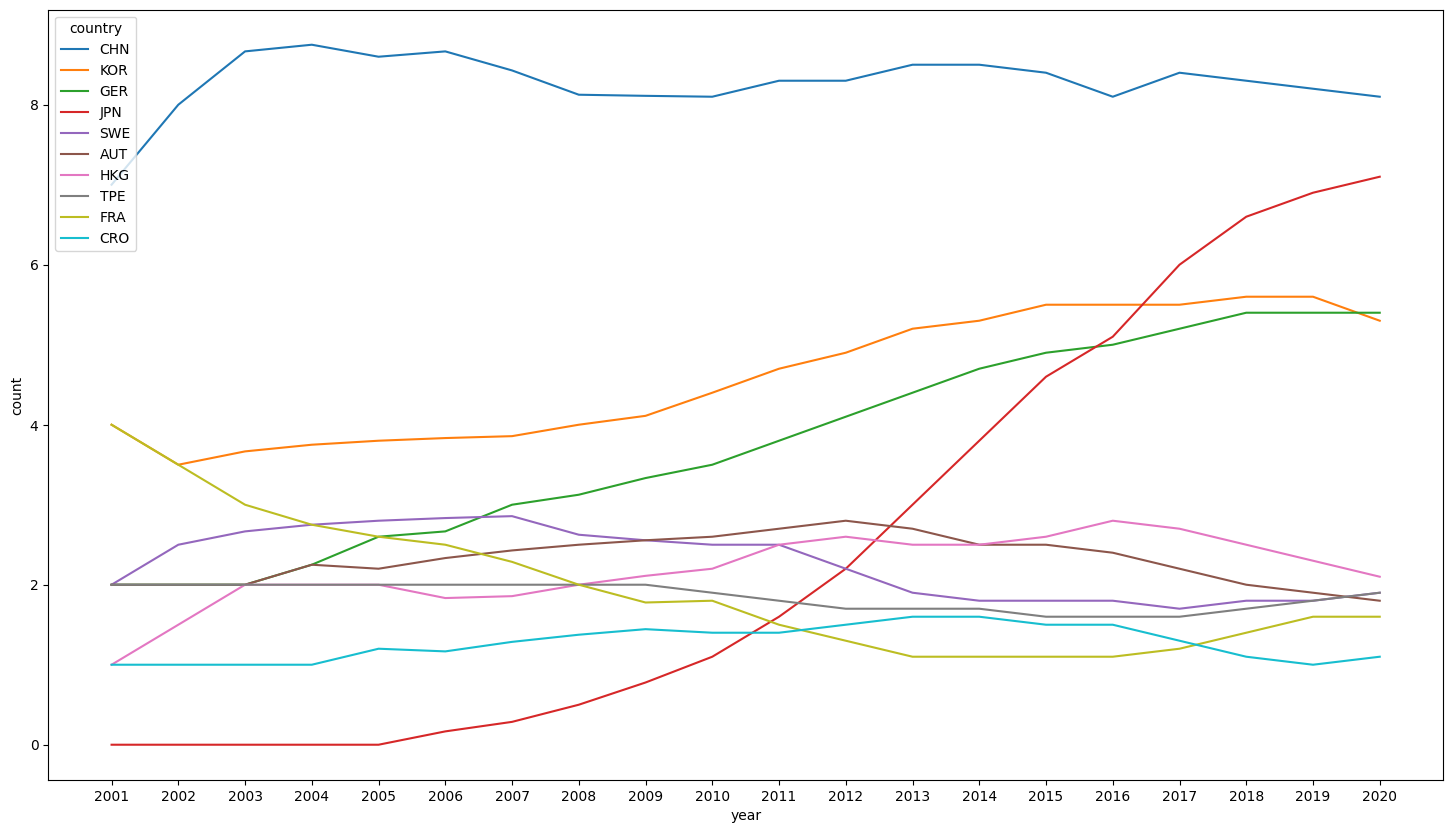

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,10))
df_country_year = pd.DataFrame(allcountry).fillna(0).astype(int).T
country_top10=df_country_year.sum().sort_values(ascending=False).head(10).index.to_list()
print(country_top10)
df_top10=df_country_year[country_top10]
# 假设你还在用 df_top10
df_top10_smooth = df_top10.rolling(window=10, min_periods=1).mean()
df_top10_smooth['year'] = df_top10_smooth.index
df_melted_smooth = df_top10_smooth.melt(id_vars='year',var_name='country', value_name='count')

# 再画图
sns.lineplot(data=df_melted_smooth, x='year',y='count',hue='country')


In [4]:
## First Round of Ratio Calculation and Visualization (Without Applying Varied Weights)

# The function "extract_and_count" is used to extract the numeric value of each of the four styles from the tuple in each cell
# before counting unique values in the df.
def extract_and_count(dataframe, list_index):    
    extracted_values = dataframe.drop(columns=["Ranking"]).map(
        lambda x: x[1][list_index] if isinstance(x[1], list) else x[1]
    )
    return extracted_values.apply(pd.Series.value_counts)

# Applying the function to extract different indices
playinghand_numeric_value = extract_and_count(ranking_styles, 0)
playingstyle_numeric_value = extract_and_count(ranking_styles, 1)
grip_numeric_value = extract_and_count(ranking_styles, 2)
stylecommonness_numeric_value = extract_and_count(ranking_styles, 3)
#print(ranking_styles['2001'])
# Display the results
print("Playing Hand Numeric Value:\n", playinghand_numeric_value)
print("Playing Style Numeric Value:\n", playingstyle_numeric_value)
print("Grip Numeric Value:\n", grip_numeric_value)
print("Style Commonness Numeric Value:\n", stylecommonness_numeric_value)


Playing Hand Numeric Value:
     2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0     21    25    26    29    27    29    29    30    32    34    34    32   
1     12    10    12    10    14    13    14    13    13    12    14    16   
99    17    15    12    11     9     8     7     7     5     4     2     2   

    2013  2014  2015  2016  2017  2018  2019  2020  
0     34    34    37    35  36.0  34.0  33.0  35.0  
1     15    15    12    14  14.0  16.0  17.0  15.0  
99     1     1     1     1   NaN   NaN   NaN   NaN  
Playing Style Numeric Value:
     2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0     28    31    34    36    39    40    41    40    42    43    45    45   
1      5     4     4     3     2     2     2     3     3     3     3     3   
99    17    15    12    11     9     8     7     7     5     4     2     2   

    2013  2014  2015  2016  2017  2018  2019  2020  
0     46    46    46    47  48.0  48.0  47.0  47.0

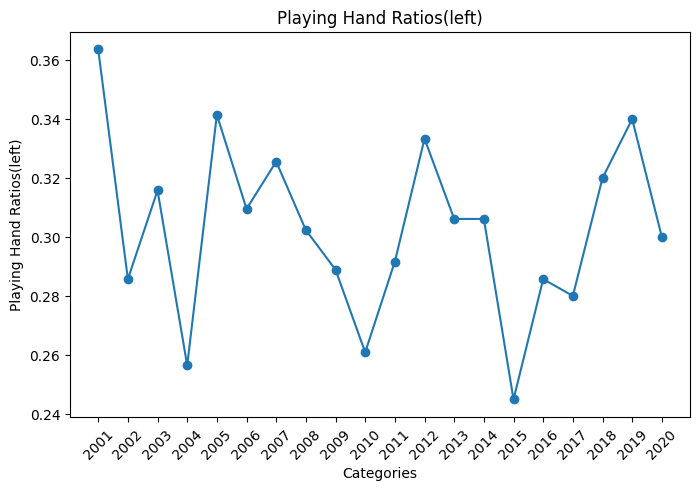

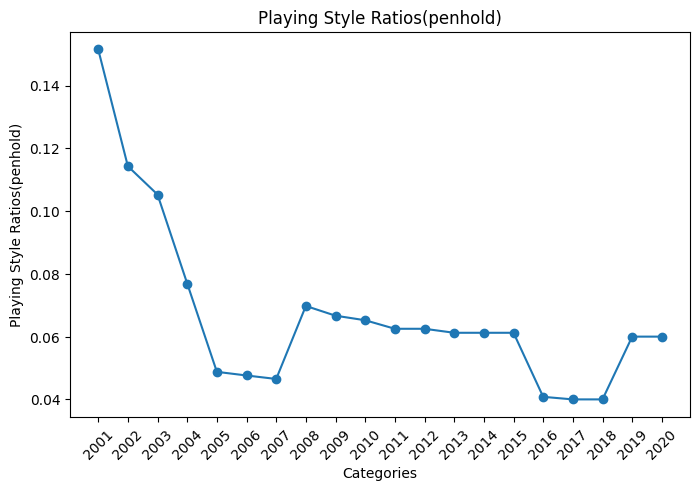

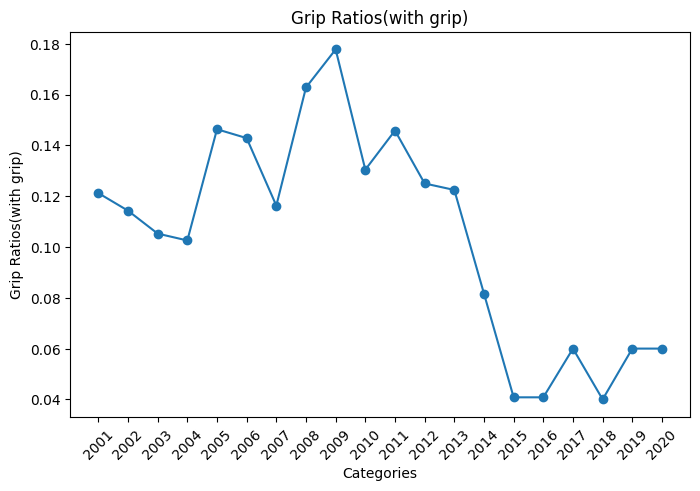

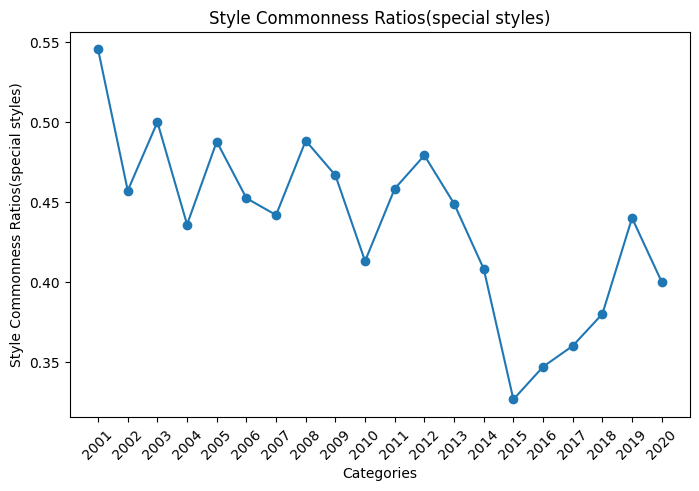

In [5]:
def calculate_and_visualize_ratios(dataframe, title):
    
    # Step 1: Compute Ratios
    ratios = {}
    for column in dataframe.columns:
        ratio = dataframe[column][1] / (dataframe[column][1] + dataframe[column][0])
        #print((dataframe[column][1] + dataframe[column][0]))
        ratios[column] = ratio

    # Step 2: Convert dictionary to two separate lists
    x = list(ratios.keys())  # Categories (e.g., Years)
    y = list(ratios.values())  # Corresponding Ratios

    # Step 3: Create the Line Plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o')  # Adding markers to highlight data points

    # Add labels and title
    plt.xlabel('Categories')  # Generalized since it can be years, styles, etc.
    plt.ylabel(title)  # Dynamic y-label based on input title
    plt.title(title)

    # Ensure all categories are displayed on the x-axis
    plt.xticks(x, rotation=45)

    # Display the plot
    plt.show()
    
    
list_to_plot = [playinghand_numeric_value, playingstyle_numeric_value, grip_numeric_value, stylecommonness_numeric_value]
calculate_and_visualize_ratios(list_to_plot[0], "Playing Hand Ratios(left)")
calculate_and_visualize_ratios(list_to_plot[1], "Playing Style Ratios(penhold)")
calculate_and_visualize_ratios(list_to_plot[2], "Grip Ratios(with grip)")
calculate_and_visualize_ratios(list_to_plot[3], "Style Commonness Ratios(special styles)")



In [6]:
## Applying Varied Weights to Players of Different Rankings  

# Sample data (assuming ranking_styles is already defined)
data = ranking_styles.copy()  # Create a copy to modify without altering the original

# Define the weight function
def compute_weight(index, max_index):
    # if index<=10:
    #     return 0.1
    # else:
    #     return 1
    return 1
    #return 2 - (index / max_index)

# Calculate the maximum index
max_index = len(data) - 1

# Create a new DataFrame to store the weighted values
weighted_df = data.copy()

# Iterate over each year (column) in the DataFrame
for year in data.columns:
    # Iterate over each player's ranking (row index) and value
    for idx, value in enumerate(data[year]):
        # Apply weight only if the value is a tuple and contains a list
        if isinstance(value, tuple) and isinstance(value[1], list):
            weight = compute_weight(idx, max_index)
            # Multiply the entire list by the weight
            modified_tuple = (value[0], [(element+1) * weight for element in value[1]])
            weighted_df.at[idx, year] = modified_tuple  # Store the modified tuple

# Display DataFrame in Jupyter Notebook or VS Code (if using interactive mode)
from IPython.display import display  
#display(weighted_df)  # Show DataFrame directly in the output

# Export the wieghted DataFrame to a CSV file
weighted_df.to_csv("styles_weighted_by_rankings.csv", index=False)


In [7]:
## Calculating the Weighted Ratios to See the Evolution of Styles

# Sample DataFrame (Assuming ranking_styles exists)
data = ranking_styles.copy()  # Create a copy to modify without altering the original

# Initialize dictionaries to store the sum and count for each component (0,1,2,3)
component_sums = {i: {} for i in range(4)}  # Store total sums for four components
component_counts = {i: {} for i in range(4)}  # Store valid row counts for each component

# Iterate over each column (year)
for column in data.columns:
    # Initialize total sum and valid count for each component
    total_sums = [0] * 4  # [Sum for list[0], Sum for list[1], Sum for list[2], Sum for list[3]]
    valid_counts = [0] * 4  # Count valid rows that contain a list as second element

    # Iterate over each cell in the column
    for value in data[column]:
        if isinstance(value, tuple) and len(value) > 1 and isinstance(value[1], list):
            for i in range(min(4, len(value[1]))):  # Ensure we do not exceed list length
                total_sums[i] += value[1][i]  # Sum up values for each list element
                valid_counts[i] += 1  # Count how many valid entries exist

    # Store the results for each component
    for i in range(4):
        component_sums[i][column] = total_sums[i] / valid_counts[i] if valid_counts[i] > 0 else 0

# Convert results to a single DataFrame
styles_evolution_weighted_df = pd.DataFrame({
    "Year": list(component_sums[0].keys()),
    "Playing_Hand_Ratio": list(component_sums[0].values()),
    "Playing_Style_Ratio": list(component_sums[1].values()),
    "Grip_Ratio": list(component_sums[2].values()),
    "Style_Commonness_Ratio": list(component_sums[3].values()),
}).set_index("Year")

# Remove the "Ranking" row from styles_evolution_weighted_df
styles_evolution_weighted_df = styles_evolution_weighted_df.drop("Ranking", errors="ignore")

# Esport the final DataFrame to a CSV file
styles_evolution_weighted_df.to_csv("styles_evolution_weighted.csv")

# Display the final DataFrame
styles_evolution_weighted_df.head()


,Playing_Hand_Ratio,Playing_Style_Ratio,Grip_Ratio,Style_Commonness_Ratio
Year,,,,
2001,0.363636,0.151515,0.121212,0.545455
2002,0.285714,0.114286,0.114286,0.457143
2003,0.315789,0.105263,0.105263,0.500000
2004,0.256410,0.076923,0.102564,0.435897
2005,0.341463,0.048780,0.146341,0.487805


Coefficients: [0.79987041 0.75213615 0.75038113]
Intercept: 0.06543059268475471


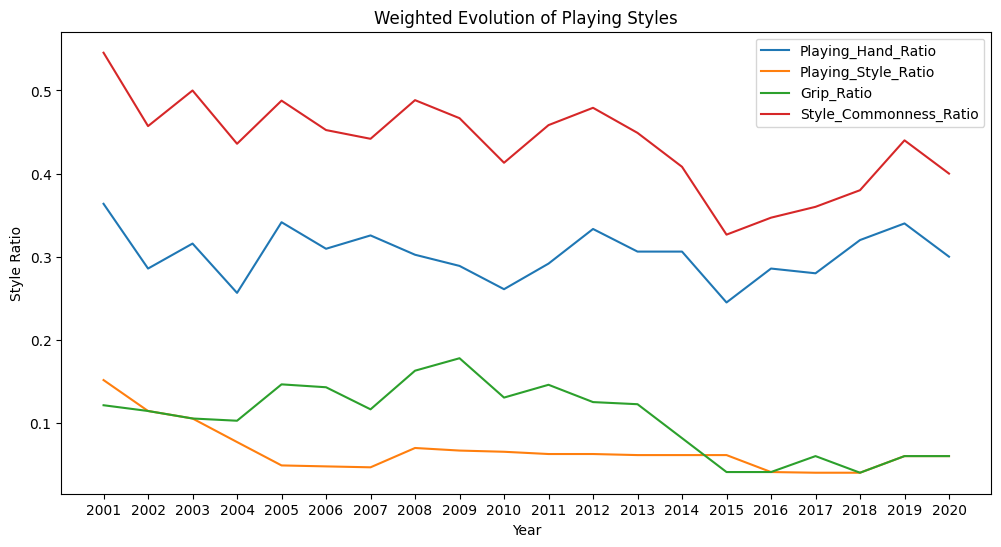

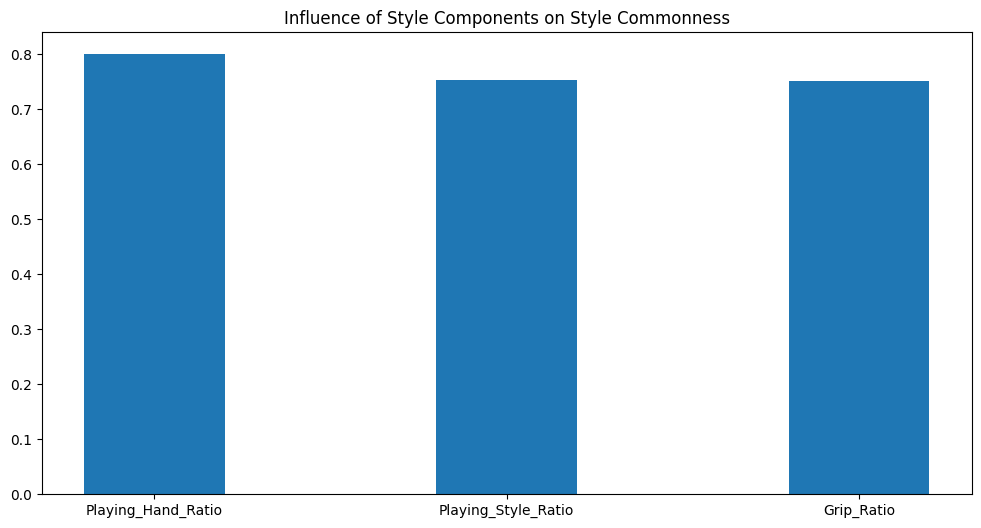

In [8]:
# Generate a line plot for each component style ratio as well as the commonness ratio

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each style component
for column in styles_evolution_weighted_df.columns:
    ax.plot(styles_evolution_weighted_df.index, styles_evolution_weighted_df[column], label=column)
    
# Set the title and labels
ax.set_title("Weighted Evolution of Playing Styles")
ax.set_xlabel("Year")
ax.set_ylabel("Style Ratio")

# Set the legend
ax.legend()




## Influence of Each Dimensions to the Evolution of the Style Commonness (Multiple Linear Regression)

x1 = styles_evolution_weighted_df['Playing_Hand_Ratio'] 
x2 = styles_evolution_weighted_df['Playing_Style_Ratio']
x3 = styles_evolution_weighted_df['Grip_Ratio']
X = [x1, x2, x3]    
X_T = np.transpose(X)
y = styles_evolution_weighted_df['Style_Commonness_Ratio']

# Initialize and train the model
model = LinearRegression()
# Fit the model
model.fit(X_T, y)

# Display the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Visualization

# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.4

# Plot the influence of each component
ax.bar(styles_evolution_weighted_df.columns[:3], model.coef_[:3], width=bar_width)

# Set the title and labels
ax.set_title("Influence of Style Components on Style Commonness")

# Display the plot
plt.show()